# ¿Qué es la Cross-Entropy o entropía cruzada?

Primero necesitamos definir qué es la **Entropía**. Vamos a tratar de entenderlo con unos ejemplos.

## Ejemplo 1

Imaginaos que estamos jugando a un juego: tenemos una bolsa con bolas de diferentes colores, y la meta del juego es adivinar de qué color es la que un voluntario extrae con el mínimo número de preguntas.

En este caso, tenemos una bola azul, una roja, una verde y una naranja:

<img src="https://image.ibb.co/cQbJMT/xe_balls.png" alt="xe_balls" border="0">

Con lo cual, cada bola tiene $\frac{1}{4}$ de probabilidades de salir.

Una de las mejores estrategias sería preguntar primero si la bola que ha sacado es azul o roja. En caso positivo, preguntaríamos si la bola es azul. En caso negativo, preguntaríamos si es verde. Así que necesitamos 2 preguntas.

<img src="https://image.ibb.co/c0qCgT/xe_balls_strategy3.png" alt="xe_balls_strategy3" border="0">

---

## Ejemplo 2

Esta vez tenemos una bolsa con bolas en las que $\frac{1}{2}$ son azules, $\frac{1}{4}$ son rojas, $\frac{1}{8}$ verdes y $\frac{1}{8}$ rojas. Ahora, la estrategia óptima sería preguntar primero si es azul, ya que hay más probabilidades de que salga una azul. Si lo es, ya hemos terminado. Si no, podríamos preguntar si es roja, que es la siguiente clase más probable. Si lo fuese, listo. Si no, podríamos preguntar si es verde (o si es naranja).

<img src="https://image.ibb.co/mb2Q1T/xe_balls_strategy2.png" alt="xe_balls_strategy2" border="0">

Ahora lo que pasa es que la mitad del tiempo ($\frac{1}{2}$) es azul, y nos cuesta 1 pregunta adivinarlo. $\frac{1}{4}$ del tiempo es roja, y nos cuesta 2 preguntas. $\frac{1}{8}$ es verde, y nos cuesta 3 preguntas, y lo mismo si es naranja.

Por lo tanto, el número de preguntas esperado para adivinar una bola son: $\frac{1}{2} \cdot 1$ (azul) $ + \frac{1}{4} \cdot 2$ (roja) $+ \frac{1}{8} \cdot 3$ (verde) $+ \frac{1}{8} \cdot 3$ (naranja) $= 1.75$

---

## Ejemplo 3

Imaginaos ahora que tenemos una bolsa llena de bolas azules. ¿Cuántas preguntas necesitamos para averiguar de qué color es la bola que saquen? **Ninguna, 0.**


De estos ejemplos podemos sacar una expresión que permita calcular el número de preguntas dependiendo de la probabilidad de la bola. Así, una bola con probabilidad $p$ cuesta $log_2 \frac{1}{p}$ preguntas.

Por ejemplo, para la bola que tiene $p=\frac{1}{8}$, necesitamos $n\_preg = log_2 \frac{1}{\frac{1}{8}} = 3$

Así que el número de preguntas esperado en total es: $n\_preg\_total = \sum_ip_i \cdot log_2 \frac{1}{p_i}$

---

Al final, una forma de entender la entropía es la siguiente: si siguieramos la estrategia óptima, cuál es el número esperado de preguntas que nos permitirían adivinar el color de la bola? Con lo cual, cuanto más complicado es el juego, mayor es la entropía. En este caso, Ejemplo 1 > Ejemplo 2 > Ejemplo 3.


De acuerdo, pues ahora que sabemos qué es la entropía, vamos a ver qué es la **entropía cruzada o cross-entropy**.

Imagináos que hubieramos seguido la estrategia del ejemplo 1 para el ejemplo 2:

<img src="https://image.ibb.co/c0qCgT/xe_balls_strategy3.png" alt="xe_balls_strategy3" border="0">
<img src="https://image.ibb.co/mb2Q1T/xe_balls_strategy2.png" alt="xe_balls_strategy2" border="0">

Entonces, hubieramos tenido que para averiguar si es de cualquier color, nos hubieran hecho falta 2 preguntas. Si calculamos el número total de preguntas necesarias, teniendo en cuenta que esta vez cada bola tiene una probabilidad, nos da que:

$n\_preg\_total = \frac{1}{2} \cdot 2 (azul) + \frac{1}{4} \cdot 2 (roja) + \frac{1}{8} \cdot 2 (verde) + \frac{1}{8} \cdot 2 (naranja) = 2$

Así que esta estrategia es peor que la estrategia que seguimos en el Ejemplo 1. Esto que acabamos de calcular es la entropía cruzada de usar esta estrategia.

Al final, intuitivamente, **la entropía es el número de preguntas esperadas usando la mejor estrategia posible, y la entropía cruzada, es el número de preguntas esperadas cuando no usas la mejor estrategia posible.**

Por este motivo, lo que intentamos es minimizar la entropía cruzada.

Formalmente, se define como:

$\text{cross-entropy} = \sum_ip_i \cdot log_2 \frac{1}{\hat{p_i}}$

Donde:

* $p_i$ es la probabilidad real de las bolas (en nuestro ejemplo, $\frac{1}{2}$ para azul, $\frac{1}{4}$ para rojo, y $\frac{1}{8}$ para verde y naranja)
* $\hat{p_i}$ es la probabilidad que hemos asumido al usar nuestra estrategia, que en este caso es que todas las bolas son igual de probables ($\frac{1}{4}$ para todos los colores)

Una forma de recordar qué va dónde en la fórmula, es acordarse de que lo que queremos hacer es averiguar cuantas preguntas hacen falta siguiendo **nuestra estrategia**, que es $\hat{p_i}$, así que dentro del $log_2$ va  $\hat{p_i}$.

**Fuente**: https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy

In [2]:
import numpy as np

In [3]:
p = np.array([0.5, 0.25, 0.125, 0.125])  # distribucion real de 4 clases

In [4]:
q_good = np.array([0.48, 0.27, 0.13, 0.12])  # muy parecida a p
q_bad = np.array([0.25, 0.25, 0.25, 0.25])  # uniforme
q_worst = np.array([0.1, 0.1, 0.4, 0.4])  # muy distinta

In [5]:
def cross_entropy(p, q):
  return -np.sum(p * np.log(q))

In [6]:
cross_entropy(p, p)

np.float64(1.2130075659799042)

In [7]:
print(cross_entropy(p, q_good))
print(cross_entropy(p, q_bad))
print(cross_entropy(p, q_worst))

1.2143784631268715
1.3862943611198906
1.9560115027140728


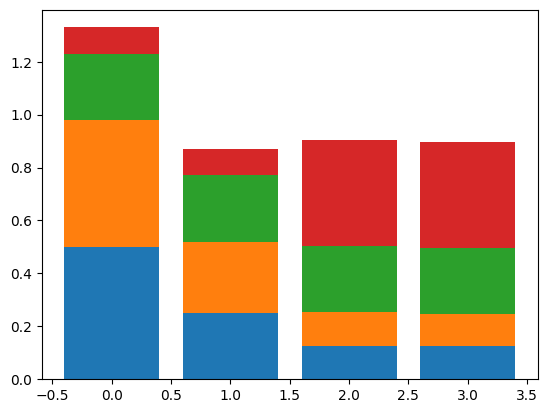

In [8]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
plt.bar(x, p)
plt.bar(x, q_good, bottom=p)
plt.bar(x, q_bad, bottom=p+q_good)
plt.bar(x, q_worst, bottom=p+q_good+q_bad)
plt.show()

In [14]:
def softmax(logits, temperature=1.0):
  return np.exp(logits / temperature) / np.sum(np.exp(logits))

In [16]:
logits = np.array([2.0, 1.0, 0.1])
print(softmax(logits, 5.0))

[0.13305004 0.10893216 0.09098778]
